In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp "/content/drive/MyDrive/perceptron.csv" .

In [ ]:
perceptron_data = np.genfromtxt('perceptron.csv', delimiter=',')

In [ ]:
perceptron_data = np.delete(perceptron_data, 0, axis=0)
X = perceptron_data[:, 0:2]
y = perceptron_data[:, 2:3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

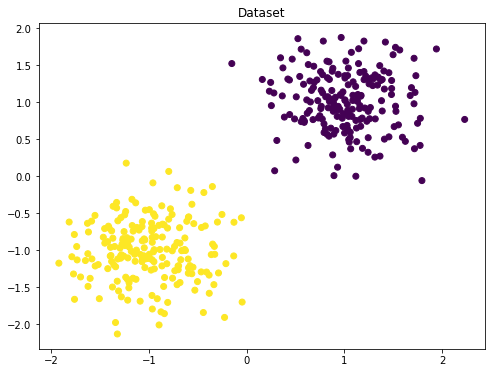

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.show()

# Perceptron

In [ ]:
class Perceptron():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100, threshold=0.5):
        n_samples, n_features = X.shape

        self.weights = np.zeros((n_features,1))
        self.bias = 0
        self.threshold = threshold

        for i in range(n_iters):
            a = np.dot(X, self.weights) + self.bias

            y_predict = self.activation(a)

            # if not (y - y_predict).any():
            if not np.array_equal(y, y_predict):
            # if (y - y_predict).all():
              delta_w = learning_rate * np.dot(X.T, y)
              delta_b = learning_rate * np.sum(y)

              self.weights += delta_w
              self.bias += delta_b

        return self.weights, self.bias

    def activation(self, x):
        return np.array([1 if elem > self.threshold else 0 if abs(elem) <= self.threshold else -1 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.activation(a)

In [ ]:
trainedPercept = Perceptron()
trainedWeight, trainedBias = trainedPercept.train(X_train, y_train,learning_rate=0.05, n_iters=500)

In [ ]:
predicted_y_train = trainedPercept.predict(X_train)
predicted_y_test = trainedPercept.predict(X_test)
print(f"training accuracy: {100 - np.mean(np.abs(predicted_y_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(predicted_y_test - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


In [ ]:
def plot_hyperplane(X, y, weights, bias, threshold=0.5):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)

    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.plot(x_hyperplane, y_hyperplane, '-')
    ###
    # #
    ###
    intercept = - bias/weights[1] + threshold
    y_hyperplane = slope * x_hyperplane + intercept
    plt.plot(x_hyperplane, y_hyperplane, '--')
    ###
    # #
    ###
    intercept = - bias/weights[1] - threshold
    y_hyperplane = slope * x_hyperplane + intercept
    plt.plot(x_hyperplane, y_hyperplane, '--')

    plt.title("Dataset and decision hyperplane")
    plt.show()

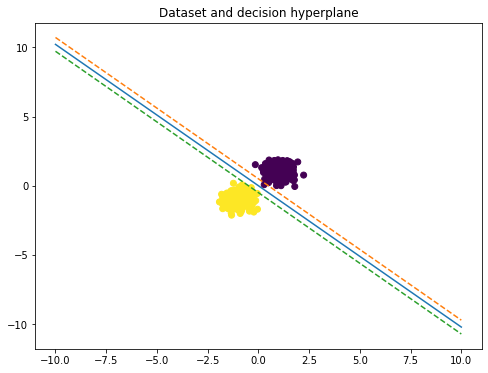

In [ ]:
plot_hyperplane(X, y, trainedWeight, trainedBias)

In [ ]:
trainedPercept = Perceptron()
trainedWeight, trainedBias = trainedPercept.train(X_train, y_train,learning_rate=0.05, n_iters=500 , threshold=0.1)

In [ ]:
predicted_y_train = trainedPercept.predict(X_train)
predicted_y_test = trainedPercept.predict(X_test)
print(f"training accuracy: {100 - np.mean(np.abs(predicted_y_train - y_train)) * 100}%")
print(f"test accuracy: {100 - np.mean(np.abs(predicted_y_test - y_test)) * 100}%")

training accuracy: 100.0%
test accuracy: 100.0%


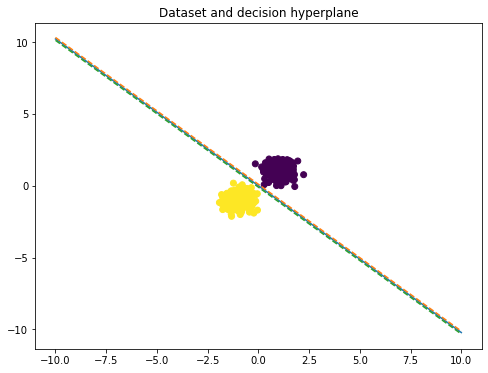

In [ ]:
plot_hyperplane(X, y, trainedWeight, trainedBias , threshold=0.1)

# AdaLine

In [ ]:
class AdaLine():

    def __init__(self):
        pass

    def train(self, X, y, learning_rate=0.05, n_iters=100):
        n_samples, n_features = X.shape

        self.weights = np.zeros((n_features,1))
        self.bias = 0

        for i in range(n_iters):
            a = np.dot(X, self.weights) + self.bias

            y_predict = self.activation(a)

            delta_w = learning_rate * np.dot(X.T, (y - y_predict))
            delta_b = learning_rate * np.sum(y - y_predict)

            self.weights += delta_w
            self.bias += delta_b

        return self.weights, self.bias

    def activation(self, x):
        return np.array([1 if elem >= 0 else -1 for elem in x])[:, np.newaxis]

    def predict(self, X):
        a = np.dot(X, self.weights) + self.bias
        return self.activation(a)

In [ ]:
x1_1 = np.random.normal(1, 0.5, 1000)
x1_2 = np.random.normal(1, 0.5, 1000)

In [ ]:
x2_1 = np.random.normal(-1, 0.5, 10)
x2_2 = np.random.normal(-1, 0.5, 10)

In [ ]:
def Xy(x1_1, x1_2, x2_1, x2_2):
  class_1 = np.column_stack((x1_1, x1_2))
  class_1 = np.column_stack((class_1, np.full(class_1.shape[0], 1)))

  class_2 = np.column_stack((x2_1, x2_2))
  class_2 = np.column_stack((class_2, np.full((class_2.shape[0], 1), -1)))

  adaline = np.row_stack((class_1, class_2))

  np.random.shuffle(adaline)

  return adaline[:, 0:2], adaline[:, 2:3]

In [ ]:
X, y = Xy(x1_1, x1_2, x2_1, x2_2)

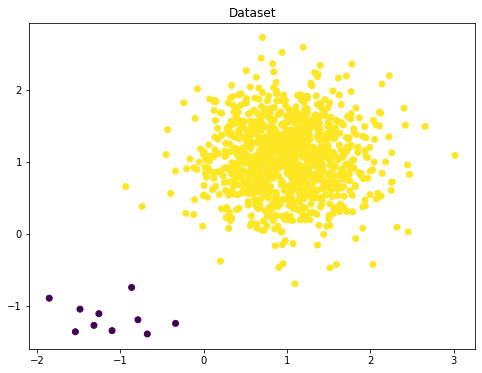

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y ,)
plt.title("Dataset")
plt.show()

In [ ]:
adalineTrained = AdaLine()
trainedWeight, trainedBias = adalineTrained.train(X, y, learning_rate=0.05, n_iters=500)

In [ ]:
predicted_y_train = adalineTrained.predict(X)
print(f"training accuracy: {100 - np.mean(np.abs(predicted_y_train - y)) * 100}%")

training accuracy: 100.0%


In [ ]:
def plot_hyperplane(X, y, weights, bias):
    """
    Plots the dataset and the estimated decision hyperplane
    """
    fig = plt.figure(figsize=(8,6))
    plt.scatter(X[:,0], X[:,1], c=y)

    slope = - weights[0]/weights[1]
    intercept = - bias/weights[1]
    x_hyperplane = np.linspace(-10,10,10)
    y_hyperplane = slope * x_hyperplane + intercept
    plt.plot(x_hyperplane, y_hyperplane, '-')

    plt.title("Dataset and decision hyperplane")
    plt.show()

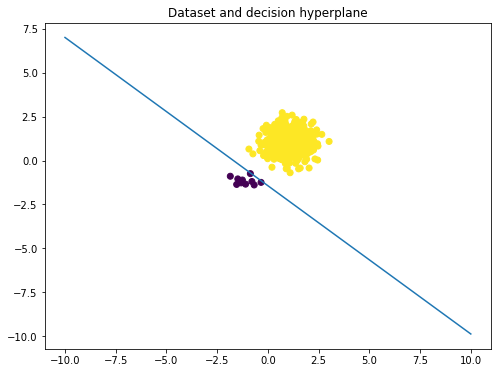

In [ ]:
plot_hyperplane(X, y, trainedWeight, trainedBias)

In [ ]:
x1_1 = np.random.normal(1, 0.5, 100)
x1_2 = np.random.normal(1, 0.5, 100)

In [ ]:
x2_1 = np.random.normal(-1, 0.5, 100)
x2_2 = np.random.normal(-1, 0.5, 100)

In [ ]:
X, y = Xy(x1_1, x1_2, x2_1, x2_2)

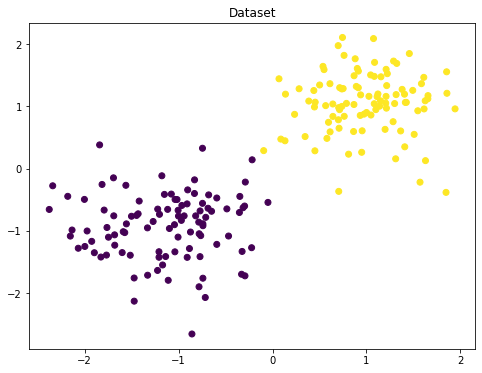

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Dataset")
plt.show()

In [ ]:
adalineTrained = AdaLine()
trainedWeight, trainedBias = adalineTrained.train(X, y, learning_rate=0.05, n_iters=500)

In [ ]:
predicted_y_train = adalineTrained.predict(X)
print(f"training accuracy: {100 - np.mean(np.abs(predicted_y_train - y)) * 100}%")

training accuracy: 100.0%


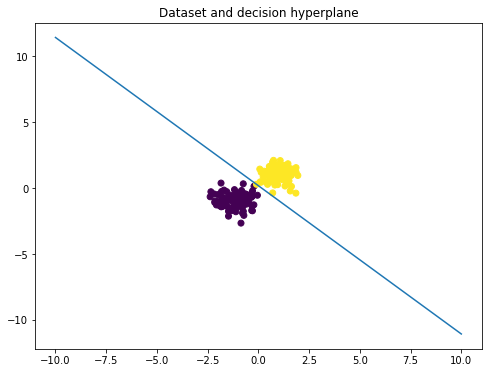

In [ ]:
plot_hyperplane(X, y, trainedWeight, trainedBias)

# Madaline

In [ ]:
!cp "/content/drive/MyDrive/madaline.csv" .

In [ ]:
madaline_data = np.genfromtxt('madaline.csv', delimiter=',')